In [7]:
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import sklearn
from sklearn.preprocessing import normalize
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from GradientDescrescator import BatchGDRegression

- normalizarea datelor (cu MinMaxScaler)

In [8]:
df = pd.read_csv("data/world-happiness-report-2017.csv")

df.dropna()

df['Happiness.Score'] = normalize([df['Happiness.Score']], 'max')[0]
df['Economy..GDP.per.Capita.'] = normalize([df['Economy..GDP.per.Capita.']], 'max')[0]
df['Freedom'] = normalize([df['Freedom']], 'max')[0]

print(df)

                      Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1         1.000000      7.594445   
1                     Denmark               2         0.998010      7.581728   
2                     Iceland               3         0.995622      7.622030   
3                 Switzerland               4         0.994295      7.561772   
4                     Finland               5         0.990978      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151         0.460528      3.543030   
151                     Syria             152         0.459334      3.663669   
152                  Tanzania             153         0.444341      3.461430   
153                   Burundi             154         0.385432      3.074690   
154  Central African Republic             155         0.357304      2.864884   

     Whisker.low  Economy..GDP.per.Capi

#### Gradul de fericire in functie de GDP

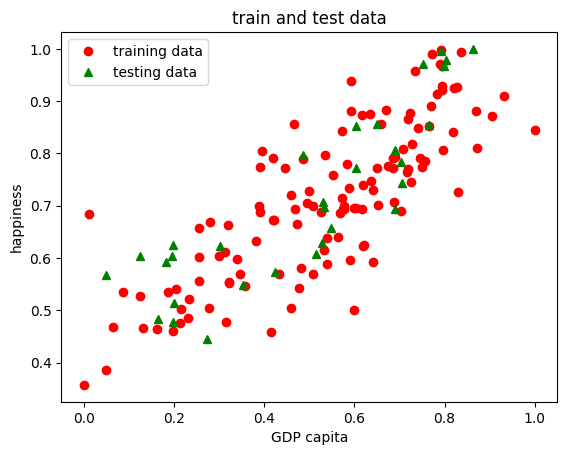

In [9]:
inputs = df["Economy..GDP.per.Capita."]
outputs = df["Happiness.Score"]

# impartire in training si testing data
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data') 
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


- metoda gradientului descrescator (tool)

In [10]:
xx = [[el] for el in trainInputs]
regressor = linear_model.SGDRegressor()
regressor.fit(xx, trainOutputs)

w0, w1 = regressor.intercept_, regressor.coef_
print(f'F(x) = {w0} + {w1} * x')

# calcularea erorii
computedTestOutputs = regressor.predict([[x] for x in testInputs])
err = mean_squared_error(testOutputs, computedTestOutputs)
print('Prediction error (tool): ', err)


F(x) = [0.5290619] + [0.32609042] * x
Prediction error (tool):  0.010879817434593675


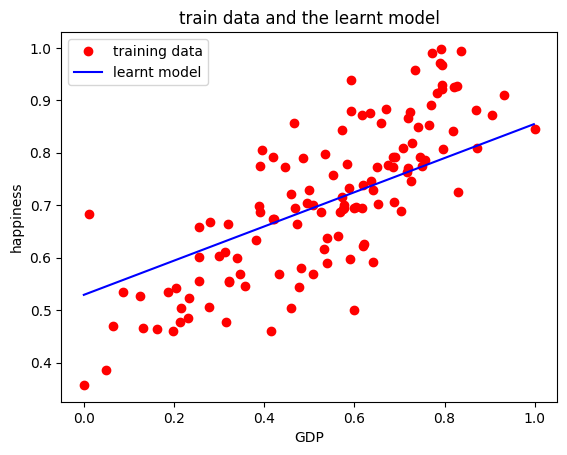

In [11]:
noOfPoints = 1000
xref = []
yref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

fix,axes = plt.subplots()
axes.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  
axes.plot(xref, yref, 'b-', label = 'learnt model')                  
axes.set_title('train data and the learnt model')
axes.set_xlabel('GDP')
axes.set_ylabel('happiness')
axes.legend()
plt.show()

- metoda gradientului descrescator (manual)

In [12]:
xx = [[el] for el in trainInputs]
regressor = BatchGDRegression()
regressor.fit(xx, trainOutputs)

w0, w1 = regressor.intercept_, regressor.coef_
print(f'F(x) = {w0} + {w1} * x')

# calcularea erorii
computedTestOutputs = regressor.predict([[x] for x in testInputs])
err = mean_squared_error(testOutputs, computedTestOutputs)
print('Prediction error (tool): ', err)

F(x) = 0.5301358763934698 + [0.3318041879026605] * x
Prediction error (tool):  0.056813052660868765


#### Gradul de fericire in functie de GDP si libertate

In [13]:
inputs = df["Economy..GDP.per.Capita."], df["Freedom"]
output = df["Family"]

# impartire in training si testing data
np.random.seed(5)

trainSample = np.random.choice(range(df.shape[0]), int(0.8 * df.shape[0]), replace = False)
testSample = [i for i in range(df.shape[0])  if not i in trainSample]

trainInputs = [[df["Economy..GDP.per.Capita."].iloc[index] for index in trainSample], [df["Freedom"].iloc[index] for index in trainSample]]
trainOutputs = [df["Happiness.Score"].iloc[index] for index in trainSample]

testInputs = [[df["Economy..GDP.per.Capita."].iloc[index] for index in testSample], [df["Freedom"].iloc[index] for index in testSample]]
testOutputs = [df["Happiness.Score"].iloc[index] for index in testSample]

- metoda gradientului descrescator (tool)

In [14]:
xx = [[el1, el2] for el1, el2 in zip(*trainInputs)]
regressor = linear_model.SGDRegressor()
regressor.fit(xx, trainOutputs)

w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

print(f'F(x) = {w0} + {w1} * x1 + {w2} * x2')

# calcularea erorii
computedTestOutputs = regressor.predict([[x1, x2] for x1, x2 in zip(*testInputs)])
err = mean_squared_error(testOutputs, computedTestOutputs)
print('Prediction error (tool): ', err)

F(x) = [0.40903469] + 0.2534940159452574 * x1 + 0.26218285787761564 * x2
Prediction error (tool):  0.006999856364456835


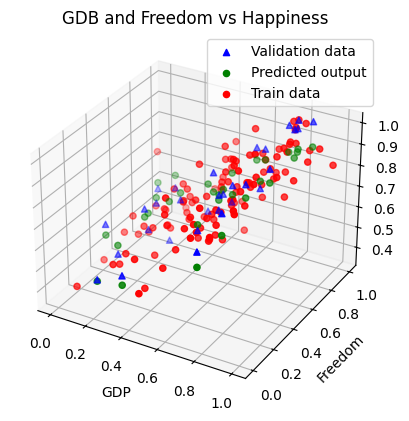

In [15]:
zpred = [w0 + w1 * x1 + w2 * x2 for x1, x2 in zip(testInputs[0], testInputs[1])] 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(testInputs[0], testInputs[1], testOutputs, c='b', marker='^', label='Validation data')
ax.scatter(testInputs[0], testInputs[1], zpred, c='g', marker="o", label='Predicted output')
ax.scatter(trainInputs[0], trainInputs[1], trainOutputs, c='r', marker='o', label='Train data')
ax.set_xlabel('GDP')
ax.set_ylabel('Freedom')
plt.legend()
plt.title("GDB and Freedom vs Happiness")
plt.show()

- metoda gradientului descrescator (manual)

In [16]:
xx = [[el1, el2] for el1, el2 in zip(*trainInputs)]
regressor = BatchGDRegression()
regressor.fit(xx, trainOutputs)

w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

print(f'F(x) = {w0} + {w1} * x1 + {w2} * x2')

# calcularea erorii
computedTestOutputs = regressor.predict([[x1, x2] for x1, x2 in zip(*testInputs)])
err = mean_squared_error(testOutputs, computedTestOutputs)
print('Prediction error (tool): ', err)

F(x) = 0.40762909005864556 + 0.26116246806055143 * x1 + 0.26440258622612434 * x2
Prediction error (tool):  0.03032520743512716


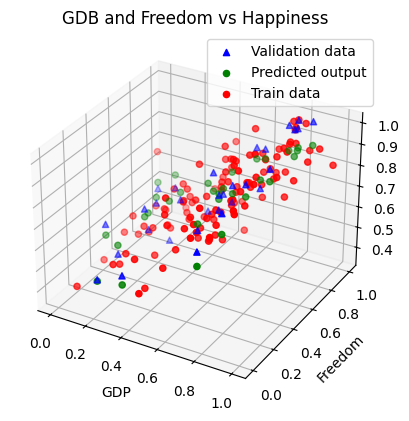

In [17]:
zpred = [w0 + w1 * x1 + w2 * x2 for x1, x2 in zip(testInputs[0], testInputs[1])] 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(testInputs[0], testInputs[1], testOutputs, c='b', marker='^', label='Validation data')
ax.scatter(testInputs[0], testInputs[1], zpred, c='g', marker="o", label='Predicted output')
ax.scatter(trainInputs[0], trainInputs[1], trainOutputs, c='r', marker='o', label='Train data')
ax.set_xlabel('GDP')
ax.set_ylabel('Freedom')
plt.legend()
plt.title("GDB and Freedom vs Happiness")
plt.show()